Disclaimer: I am not a financial advisor. Do not take anything on this code as financial advice, ever.
Do your own research.
Consult a professional investment advisor before making any investment decisions!

This code uses the Markowitz Efficient Frontier to optmize a stock portfolio.
- [Efficient Frontier](https://www.investopedia.com/terms/e/efficientfrontier.asp)
- [Markowitz Efficient Set](https://www.investopedia.com/terms/m/markowitzefficientset.asp)
- [Efficient Frontier - Wikipedia](https://en.wikipedia.org/wiki/Efficient_frontier)

## Dependencies

In [21]:
'''
!pip install investpy
!pip install pandas
!pip install yfinance
!pip install PyPortfolioOpt
!pip install vectorbt
'''


'\n!pip install investpy\n!pip install pandas\n!pip install yfinance\n!pip install PyPortfolioOpt\n!pip install vectorbt\n'

## Imports

In [56]:
import investpy as inv
import pandas as pd
import yfinance as yf
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import CovarianceShrinkage, risk_models, expected_returns, objective_functions, plotting
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
import vectorbt as vbt

## Config

In [173]:
portfolio_value = 20000

## Stock List

In [90]:
#lista_tickers = inv.get_stocks_list('brazil')

#source: https://infograficos.valor.globo.com/carteira-valor/
#november-22 
'''
Removed:
1 Failed download:
- AURE3.SA: Data doesn't exist for startDate = 1514775600, endDate = 1640919600
'''

lista_tickers = ['ITUB4','VALE3', 'B3SA3','MULT3','BBDC4','LREN3','BPAC11','ITSA4','ALSO3', 'ANIM3','CYRE3','SBSP3','SOMA3','RENT3','MULT3','RDOR3','CCRO3','CIEL3',
'CASH3','AGRO3','HYPE3', 'PRIO3', 'UNIP6', 'ELET3', 'PCAR3', 'RDOR3', 'WEGE3', 'ABEV3', 'LREN3', 'TOTS3','CYRE3', 'GGBR4', 'RADL3', 'COGN3', 'CURY3','MGLU3','KLBN11','MRVE3', 'YDUQ3',
'BBDC4', 'ELET3', 'MULT3', 'STBP3', 'VBBR3', 'CCRO3', 'MDIA3', 'VBBR3', 'ALSO3', 'BPAC11', 'UGPA3', 'SIMH3', 'CPLE6', 'ODPV3', 'TAEE11', 'HYPE3', 'PSSA3', 'TOTS3', 'AMER3',
'SLCE3', 'GGBR4', 'EMBR3', 'MYPK3', 'TRPL4', 'SLCE3', 'ALSO3', 'EGIE3', 'RANI3', 'RAPT4', 'EQTL3', 'JBSS3', 'ASAI3', 'IGTI11' ]


lista_tickers = list(set(lista_tickers))
#lista_tickers = list(OrderedDict.fromkeys(lista_tickers))

for i in range(len(lista_tickers)):
    lista_tickers[i] = lista_tickers[i] +'.SA'
    
len(lista_tickers)

56

In [93]:
df = yf.download(lista_tickers, start='2021-11-22', end='2022-05-22')['Adj Close']
df = df.dropna()
df.head()

[*********************100%***********************]  56 of 56 completed


,ABEV3.SA,AGRO3.SA,ALSO3.SA,AMER3.SA,ANIM3.SA,ASAI3.SA,B3SA3.SA,BBDC4.SA,BPAC11.SA,CASH3.SA,...,STBP3.SA,TAEE11.SA,TOTS3.SA,TRPL4.SA,UGPA3.SA,UNIP6.SA,VALE3.SA,VBBR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-22,16.669449,20.486691,21.419958,30.742510,6.86,13.678971,11.541481,17.709536,19.450830,3.68,...,5.216389,31.364996,32.828682,22.291431,12.677303,69.421768,61.880367,21.171091,34.080608,21.626160
2021-11-23,16.553957,20.579889,21.292400,30.673889,6.90,13.748407,11.427020,18.051790,19.626593,3.48,...,5.340588,31.303009,31.192207,22.460232,13.309733,70.395325,63.510014,21.772928,33.579288,21.149769
2021-11-24,16.457712,20.910318,21.321836,31.350300,7.33,13.609535,11.627326,18.516905,20.114817,3.44,...,5.473660,31.657217,31.856714,22.648888,13.261821,67.909019,64.984009,21.452595,32.959991,21.546761
2021-11-25,16.582829,21.410200,21.861507,31.840456,7.35,13.738488,11.799018,18.666092,21.325611,3.55,...,5.509145,31.860886,32.124500,22.768042,13.549289,68.665398,64.544548,21.617615,33.225399,22.033077
2021-11-26,16.063112,20.834066,20.507427,29.860229,6.99,13.252433,11.236252,17.920153,20.329634,3.18,...,5.411560,31.736914,31.073191,22.768042,13.070177,67.991394,62.841675,21.035192,32.134270,20.732925


In [96]:
#out of samples
df_out = yf.download(lista_tickers, start='2022-05-23', end='2022-11-23')['Adj Close']
df_out = df_out.dropna()
df_out.head()

[*********************100%***********************]  56 of 56 completed


,ABEV3.SA,AGRO3.SA,ALSO3.SA,AMER3.SA,ANIM3.SA,ASAI3.SA,B3SA3.SA,BBDC4.SA,BPAC11.SA,CASH3.SA,...,STBP3.SA,TAEE11.SA,TOTS3.SA,TRPL4.SA,UGPA3.SA,UNIP6.SA,VALE3.SA,VBBR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-23,14.08,27.810312,19.469999,24.070000,5.55,15.87,11.885847,19.665113,24.128157,1.93,...,6.831408,39.374878,26.961956,25.370001,13.27753,91.541985,78.833992,19.908564,26.352985,17.959999
2022-05-24,14.13,27.999315,19.010000,22.879999,5.36,15.90,11.807263,20.078285,23.950453,1.86,...,6.747758,40.299305,26.075182,25.670000,13.57000,90.882195,79.898804,19.466805,25.866987,17.670000
2022-05-25,14.04,28.062315,19.000000,21.889999,5.47,15.72,11.699209,19.852022,24.365095,1.86,...,6.877880,40.020050,26.443842,25.129999,13.79000,91.577652,80.145988,19.574791,25.103275,17.670000
2022-05-26,14.21,28.296318,18.850000,21.500000,5.55,16.09,12.190360,19.960238,24.631649,1.97,...,6.831408,38.912663,27.390398,24.490000,14.38000,88.804733,80.098450,19.830029,25.500008,18.059999
2022-05-27,14.21,28.053316,19.209999,21.490000,5.51,15.80,12.475227,20.245520,24.878460,1.96,...,6.924352,38.527485,27.659420,24.290001,14.27000,88.626419,81.496017,20.006731,26.005842,17.250000


## Efficient Frontier 1

In [98]:

mean = expected_returns.mean_historical_return(df)

s = CovarianceShrinkage(df).ledoit_wolf()

In [99]:
corr = s.corr()
corr.style.background_gradient(cmap='coolwarm', axis = None).format(precision=2)

,ABEV3.SA,AGRO3.SA,ALSO3.SA,AMER3.SA,ANIM3.SA,ASAI3.SA,B3SA3.SA,BBDC4.SA,BPAC11.SA,CASH3.SA,CCRO3.SA,CIEL3.SA,COGN3.SA,CPLE6.SA,CURY3.SA,CYRE3.SA,EGIE3.SA,ELET3.SA,EMBR3.SA,EQTL3.SA,GGBR4.SA,HYPE3.SA,IGTI11.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LREN3.SA,MDIA3.SA,MGLU3.SA,MRVE3.SA,MULT3.SA,MYPK3.SA,ODPV3.SA,PCAR3.SA,PRIO3.SA,PSSA3.SA,RADL3.SA,RANI3.SA,RAPT4.SA,RDOR3.SA,RENT3.SA,SBSP3.SA,SIMH3.SA,SLCE3.SA,SOMA3.SA,STBP3.SA,TAEE11.SA,TOTS3.SA,TRPL4.SA,UGPA3.SA,UNIP6.SA,VALE3.SA,VBBR3.SA,WEGE3.SA,YDUQ3.SA
ABEV3.SA,1.00,-0.16,0.84,0.75,0.58,0.80,0.81,0.44,0.85,0.72,0.75,0.64,0.70,0.62,0.81,0.83,0.74,0.76,0.69,0.76,-0.20,0.82,0.81,0.71,0.45,0.03,-0.22,0.81,0.82,0.71,0.84,0.82,0.73,0.61,0.78,0.09,0.85,0.82,0.38,0.72,0.68,0.83,0.74,0.79,-0.52,0.80,0.73,0.41,0.78,0.28,0.81,0.16,-0.51,0.81,0.67,0.72
AGRO3.SA,-0.16,1.00,-0.07,0.04,-0.16,-0.09,-0.11,-0.45,-0.07,-0.00,-0.30,-0.19,-0.18,-0.20,-0.05,-0.12,-0.23,-0.14,0.06,-0.01,0.18,-0.13,-0.04,-0.34,-0.38,-0.08,0.12,-0.17,-0.20,0.07,-0.12,-0.07,-0.08,-0.02,0.03,0.28,-0.07,-0.06,0.14,-0.12,-0.02,-0.16,-0.04,-0.08,0.62,-0.07,-0.13,-0.10,-0.02,-0.27,-0.11,0.27,0.36,-0.06,-0.00,-0.14
ALSO3.SA,0.84,-0.07,1.00,0.85,0.78,0.85,0.91,0.39,0.93,0.84,0.87,0.80,0.88,0.71,0.93,0.95,0.79,0.88,0.69,0.85,-0.01,0.91,0.96,0.67,0.35,-0.14,-0.08,0.94,0.77,0.81,0.96,0.97,0.82,0.82,0.82,0.26,0.88,0.90,0.46,0.89,0.81,0.93,0.76,0.94,-0.34,0.94,0.90,0.59,0.88,0.41,0.92,0.25,-0.37,0.94,0.71,0.86
AMER3.SA,0.75,0.04,0.85,1.00,0.67,0.72,0.76,0.33,0.83,0.79,0.75,0.64,0.76,0.60,0.84,0.83,0.66,0.70,0.73,0.68,0.17,0.79,0.83,0.66,0.36,-0.10,0.13,0.86,0.68,0.93,0.83,0.83,0.71,0.71,0.77,0.42,0.79,0.77,0.57,0.79,0.72,0.79,0.64,0.81,-0.18,0.84,0.73,0.51,0.84,0.24,0.83,0.43,-0.07,0.88,0.71,0.72
ANIM3.SA,0.58,-0.16,0.78,0.67,1.00,0.67,0.70,0.29,0.70,0.66,0.87,0.67,0.84,0.61,0.72,0.74,0.62,0.65,0.53,0.62,0.05,0.75,0.72,0.48,0.25,-0.05,0.03,0.74,0.55,0.69,0.77,0.76,0.59,0.73,0.65,0.17,0.70,0.74,0.37,0.74,0.69,0.76,0.56,0.78,-0.35,0.78,0.80,0.58,0.73,0.44,0.77,0.22,-0.20,0.75,0.55,0.84
ASAI3.SA,0.80,-0.09,0.85,0.72,0.67,1.00,0.81,0.35,0.88,0.83,0.81,0.70,0.80,0.57,0.81,0.88,0.77,0.80,0.61,0.82,-0.09,0.84,0.87,0.59,0.28,-0.24,-0.12,0.83,0.74,0.67,0.87,0.83,0.70,0.79,0.80,0.13,0.79,0.86,0.38,0.73,0.76,0.88,0.72,0.86,-0.43,0.89,0.79,0.44,0.85,0.25,0.83,0.32,-0.48,0.85,0.64,0.78
B3SA3.SA,0.81,-0.11,0.91,0.76,0.70,0.81,1.00,0.33,0.91,0.82,0.81,0.70,0.83,0.69,0.86,0.89,0.76,0.84,0.61,0.80,-0.01,0.88,0.90,0.66,0.34,-0.19,-0.14,0.88,0.69,0.75,0.88,0.90,0.74,0.78,0.74,0.23,0.83,0.89,0.32,0.83,0.81,0.90,0.73,0.88,-0.38,0.91,0.82,0.57,0.84,0.41,0.86,0.14,-0.38,0.89,0.75,0.78
BBDC4.SA,0.44,-0.45,0.39,0.33,0.29,0.35,0.33,1.00,0.34,0.18,0.43,0.48,0.43,0.33,0.39,0.43,0.40,0.36,0.34,0.22,0.01,0.44,0.36,0.82,0.89,-0.12,-0.17,0.42,0.41,0.21,0.45,0.37,0.44,0.19,0.30,-0.00,0.39,0.25,0.03,0.39,0.17,0.47,0.30,0.32,-0.39,0.32,0.43,0.19,0.26,0.25,0.41,-0.04,-0.19,0.34,0.14,0.46
BPAC11.SA,0.85,-0.07,0.93,0.83,0.70,0.88,0.91,0.34,1.00,0.89,0.84,0.74,0.83,0.69,0.90,0.93,0.82,0.86,0.70,0.86,-0.01,0.89,0.93,0.66,0.31,-0.19,-0.05,0.92,0.75,0.81,0.93,0.91,0.76,0.80,0.83,0.22,0.87,0.90,0.50,0.85,0.83,0.93,0.80,0.92,-0.39,0.94,0.84,0.54,0.91,0.33,0.91,0.27,-0.40,0.93,0.75,0.79
CASH3.SA,0.72,-0.00,0.84,0.79,0.66,0.83,0.82,0.18,0.89,1.00,0.78,0.69,0.73,0.63,0.79,0.86,0.72,0.78,0.66,0.82,0.08,0.83,0.88,0.55,0.21,-0.26,0.01,0.86,0.68,0.82,0.86,0.86,0.72,0.79,0.76,0.34,0.79,0.84,0.47,0.81,0.84,0.82,0.73,0.87,-0.20,0.90,0.75,0.47,0.89,0.25,0.81,0.36,-0.32,0.85,0.68,0.74


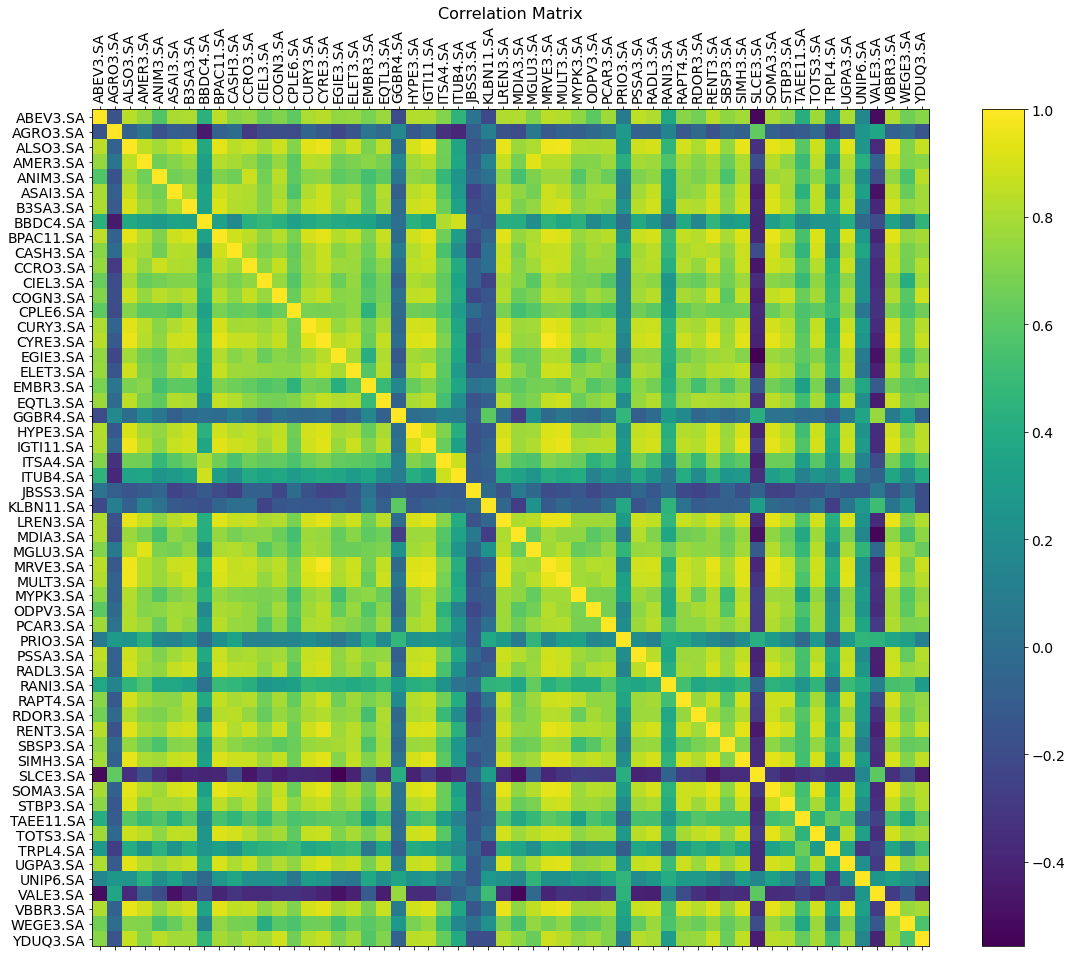

In [100]:
f = plt.figure(figsize=(19, 15))
plt.matshow(s.corr(), fignum=f.number)
plt.xticks(range(s.select_dtypes(['number']).shape[1]), s.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(s.select_dtypes(['number']).shape[1]), s.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [111]:
#Expected returns

exp_return = expected_returns.mean_historical_return(df)
exp_return

ABEV3.SA    -0.298566
AGRO3.SA     0.850648
ALSO3.SA    -0.216934
AMER3.SA    -0.424786
ANIM3.SA    -0.375877
ASAI3.SA     0.371596
B3SA3.SA     0.051325
BBDC4.SA     0.199054
BPAC11.SA    0.585154
CASH3.SA    -0.727780
CCRO3.SA     0.291818
CIEL3.SA     2.170844
COGN3.SA     0.195991
CPLE6.SA     0.811366
CURY3.SA     0.025925
CYRE3.SA     0.143114
EGIE3.SA     0.341088
ELET3.SA     0.986677
EMBR3.SA    -0.621371
EQTL3.SA     0.114150
GGBR4.SA     0.284533
HYPE3.SA     0.922033
IGTI11.SA    0.064414
ITSA4.SA     0.104528
ITUB4.SA     0.319905
JBSS3.SA    -0.008908
KLBN11.SA   -0.058204
LREN3.SA    -0.314352
MDIA3.SA    -0.318049
MGLU3.SA    -0.834878
MRVE3.SA    -0.282759
MULT3.SA     0.577942
MYPK3.SA     0.038998
ODPV3.SA    -0.397486
PCAR3.SA    -0.170436
PRIO3.SA     0.412145
PSSA3.SA    -0.136633
RADL3.SA    -0.387248
RANI3.SA     0.405537
RAPT4.SA     0.001307
RDOR3.SA    -0.606963
RENT3.SA     0.123065
SBSP3.SA     0.906480
SIMH3.SA     0.160890
SLCE3.SA     1.309611
SOMA3.SA  

In [117]:
#Sharp ratio

ef = EfficientFrontier(mean, s)

#para não alocar recursos nas ações que estão zeradas e manter apenas as relevantes
ef.add_objective(objective_functions.L2_reg, gamma = 0.1)

w = ef.max_sharpe()

cleaned_weights  = ef.clean_weights()
cleaned_weights_ = cleaned_weights.values()
cleaned_weights_ = list(cleaned_weights_)
cleaned_weights_ = np.array(cleaned_weights_)

print(cleaned_weights)

OrderedDict([('ABEV3.SA', 0.0), ('AGRO3.SA', 0.07504), ('ALSO3.SA', 0.0), ('AMER3.SA', 0.0), ('ANIM3.SA', 0.0), ('ASAI3.SA', 0.0), ('B3SA3.SA', 0.0), ('BBDC4.SA', 0.0), ('BPAC11.SA', 0.0), ('CASH3.SA', 0.0), ('CCRO3.SA', 0.0), ('CIEL3.SA', 0.17113), ('COGN3.SA', 0.0), ('CPLE6.SA', 0.12176), ('CURY3.SA', 0.0), ('CYRE3.SA', 0.0), ('EGIE3.SA', 0.01334), ('ELET3.SA', 0.05464), ('EMBR3.SA', 0.0), ('EQTL3.SA', 0.0), ('GGBR4.SA', 0.0), ('HYPE3.SA', 0.09497), ('IGTI11.SA', 0.0), ('ITSA4.SA', 0.0), ('ITUB4.SA', 0.00552), ('JBSS3.SA', 0.0), ('KLBN11.SA', 0.0), ('LREN3.SA', 0.0), ('MDIA3.SA', 0.0), ('MGLU3.SA', 0.0), ('MRVE3.SA', 0.0), ('MULT3.SA', 0.0), ('MYPK3.SA', 0.0), ('ODPV3.SA', 0.0), ('PCAR3.SA', 0.0), ('PRIO3.SA', 0.0), ('PSSA3.SA', 0.0), ('RADL3.SA', 0.0), ('RANI3.SA', 0.0), ('RAPT4.SA', 0.0), ('RDOR3.SA', 0.0), ('RENT3.SA', 0.0), ('SBSP3.SA', 0.07163), ('SIMH3.SA', 0.0), ('SLCE3.SA', 0.1797), ('SOMA3.SA', 0.0), ('STBP3.SA', 0.0), ('TAEE11.SA', 0.09563), ('TOTS3.SA', 0.0), ('TRPL4.SA', 

c:\Python310\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:257: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


In [106]:
ef.portfolio_performance(verbose=True)

Expected annual return: 112.5%
Annual volatility: 18.2%
Sharpe Ratio: 6.05


(1.1246292681472103, 0.18245788677938055, 6.0541601552300985)

In [107]:
latest_prices = get_latest_prices(df)
da = DiscreteAllocation(w, latest_prices, total_portfolio_value=portfolio_value)
allocation, leftover = da.lp_portfolio()
print('Qtd ações alocadas: ',allocation)
print('Sobrou: R$',leftover)

Qtd ações alocadas:  {'AGRO3.SA': 54, 'CIEL3.SA': 990, 'CPLE6.SA': 340, 'EGIE3.SA': 6, 'ELET3.SA': 25, 'HYPE3.SA': 50, 'ITUB4.SA': 5, 'SBSP3.SA': 31, 'SLCE3.SA': 68, 'TAEE11.SA': 49, 'UNIP6.SA': 20, 'VALE3.SA': 6}
Sobrou: R$ 0.037377230371930636


## Efficient Frontier 2

In [108]:
mean_2 = expected_returns.mean_historical_return(df_out)

s_2 = CovarianceShrinkage(df_out).ledoit_wolf()

In [109]:
corr_2 = s_2.corr()
corr_2.style.background_gradient(cmap='coolwarm', axis = None).format(precision=2)

,ABEV3.SA,AGRO3.SA,ALSO3.SA,AMER3.SA,ANIM3.SA,ASAI3.SA,B3SA3.SA,BBDC4.SA,BPAC11.SA,CASH3.SA,CCRO3.SA,CIEL3.SA,COGN3.SA,CPLE6.SA,CURY3.SA,CYRE3.SA,EGIE3.SA,ELET3.SA,EMBR3.SA,EQTL3.SA,GGBR4.SA,HYPE3.SA,IGTI11.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LREN3.SA,MDIA3.SA,MGLU3.SA,MRVE3.SA,MULT3.SA,MYPK3.SA,ODPV3.SA,PCAR3.SA,PRIO3.SA,PSSA3.SA,RADL3.SA,RANI3.SA,RAPT4.SA,RDOR3.SA,RENT3.SA,SBSP3.SA,SIMH3.SA,SLCE3.SA,SOMA3.SA,STBP3.SA,TAEE11.SA,TOTS3.SA,TRPL4.SA,UGPA3.SA,UNIP6.SA,VALE3.SA,VBBR3.SA,WEGE3.SA,YDUQ3.SA
ABEV3.SA,1.00,0.24,0.66,0.53,0.49,0.51,0.68,0.40,0.73,0.62,0.60,0.53,0.50,0.14,0.57,0.66,0.11,0.58,0.46,0.47,-0.11,0.47,0.63,0.58,0.55,-0.32,-0.30,0.68,0.56,0.60,0.62,0.67,0.34,0.39,0.46,-0.05,0.52,0.64,0.30,0.62,0.63,0.70,0.54,0.67,-0.12,0.67,0.63,0.28,0.70,0.40,0.51,0.23,-0.30,0.65,0.52,0.48
AGRO3.SA,0.24,1.00,0.56,0.51,0.58,0.39,0.53,0.48,0.53,0.59,0.58,0.32,0.52,0.31,0.53,0.44,0.13,0.42,0.30,0.41,0.29,0.28,0.46,0.46,0.45,-0.12,0.07,0.51,0.19,0.55,0.43,0.49,0.25,0.34,0.61,0.49,0.59,0.35,0.49,0.49,0.58,0.55,0.38,0.61,0.52,0.60,0.58,0.28,0.53,0.34,0.62,0.61,0.16,0.57,0.30,0.49
ALSO3.SA,0.66,0.56,1.00,0.77,0.83,0.75,0.93,0.49,0.92,0.85,0.87,0.64,0.84,0.49,0.85,0.95,0.26,0.84,0.50,0.83,-0.07,0.67,0.94,0.74,0.68,-0.55,-0.39,0.94,0.59,0.85,0.86,0.96,0.51,0.67,0.70,0.10,0.80,0.83,0.56,0.82,0.81,0.94,0.77,0.93,0.01,0.94,0.89,0.58,0.87,0.73,0.71,0.52,-0.35,0.90,0.49,0.75
AMER3.SA,0.53,0.51,0.77,1.00,0.73,0.61,0.72,0.38,0.71,0.87,0.73,0.42,0.79,0.35,0.76,0.81,0.11,0.71,0.42,0.68,-0.04,0.63,0.70,0.50,0.46,-0.38,-0.32,0.83,0.73,0.91,0.75,0.75,0.44,0.58,0.53,0.03,0.73,0.67,0.60,0.75,0.80,0.79,0.66,0.71,-0.13,0.78,0.66,0.50,0.73,0.62,0.64,0.40,-0.18,0.75,0.36,0.75
ANIM3.SA,0.49,0.58,0.83,0.73,1.00,0.64,0.82,0.45,0.73,0.76,0.79,0.52,0.93,0.39,0.74,0.81,0.18,0.70,0.56,0.71,0.09,0.56,0.79,0.62,0.60,-0.49,-0.32,0.83,0.47,0.78,0.80,0.81,0.51,0.69,0.57,0.15,0.80,0.68,0.50,0.74,0.74,0.80,0.57,0.80,0.18,0.85,0.69,0.44,0.67,0.64,0.71,0.46,-0.16,0.83,0.34,0.92
ASAI3.SA,0.51,0.39,0.75,0.61,0.64,1.00,0.73,0.27,0.68,0.65,0.70,0.60,0.68,0.36,0.64,0.71,0.24,0.67,0.41,0.63,-0.28,0.54,0.78,0.50,0.44,-0.39,-0.35,0.77,0.51,0.66,0.58,0.80,0.45,0.48,0.70,-0.06,0.70,0.66,0.38,0.64,0.60,0.73,0.57,0.73,-0.05,0.78,0.74,0.42,0.69,0.55,0.51,0.41,-0.55,0.66,0.19,0.60
B3SA3.SA,0.68,0.53,0.93,0.72,0.82,0.73,1.00,0.54,0.88,0.82,0.88,0.65,0.83,0.36,0.78,0.89,0.14,0.78,0.58,0.76,-0.09,0.60,0.89,0.78,0.74,-0.57,-0.34,0.90,0.57,0.84,0.80,0.89,0.47,0.67,0.66,0.10,0.82,0.82,0.52,0.77,0.83,0.88,0.68,0.91,0.01,0.91,0.85,0.45,0.83,0.65,0.70,0.46,-0.35,0.89,0.49,0.75
BBDC4.SA,0.40,0.48,0.49,0.38,0.45,0.27,0.54,1.00,0.55,0.43,0.48,0.34,0.43,0.14,0.40,0.46,0.02,0.45,0.39,0.39,0.01,0.22,0.48,0.82,0.85,-0.31,-0.17,0.47,0.27,0.43,0.43,0.49,0.21,0.13,0.27,0.21,0.43,0.37,0.40,0.49,0.45,0.48,0.42,0.51,0.10,0.48,0.41,0.12,0.31,0.30,0.46,0.19,-0.00,0.52,0.31,0.38
BPAC11.SA,0.73,0.53,0.92,0.71,0.73,0.68,0.88,0.55,1.00,0.82,0.82,0.61,0.75,0.39,0.83,0.88,0.23,0.81,0.57,0.72,-0.00,0.66,0.89,0.77,0.71,-0.43,-0.27,0.88,0.58,0.76,0.80,0.89,0.53,0.54,0.71,0.12,0.76,0.80,0.50,0.81,0.81,0.93,0.75,0.91,-0.00,0.88,0.86,0.50,0.89,0.65,0.71,0.48,-0.27,0.86,0.56,0.69
CASH3.SA,0.62,0.59,0.85,0.87,0.76,0.65,0.82,0.43,0.82,1.00,0.80,0.49,0.81,0.32,0.81,0.85,0.08,0.73,0.54,0.69,0.03,0.61,0.76,0.59,0.52,-0.42,-0.24,0.89,0.73,0.93,0.84,0.81,0.51,0.60,0.66,0.10,0.77,0.75,0.59,0.78,0.91,0.86,0.69,0.81,-0.11,0.89,0.76,0.53,0.82,0.60,0.70,0.52,-0.21,0.84,0.50,0.76


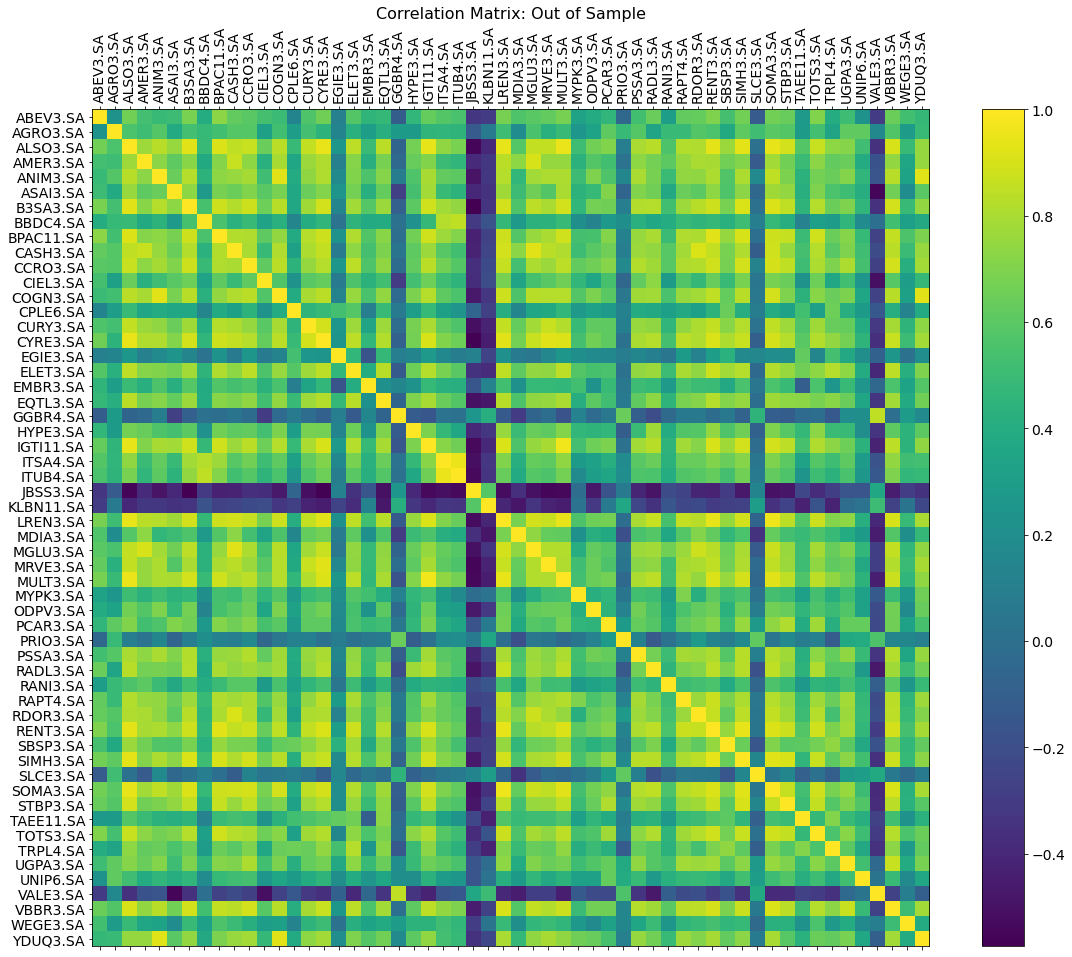

In [110]:
f_2 = plt.figure(figsize=(19, 15))
plt.matshow(s_2.corr(), fignum=f_2.number)
plt.xticks(range(s_2.select_dtypes(['number']).shape[1]), s.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(s_2.select_dtypes(['number']).shape[1]), s.select_dtypes(['number']).columns, fontsize=14)
cb_2 = plt.colorbar()
cb_2.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix: Out of Sample', fontsize=16);

In [112]:
exp_return_2 = expected_returns.mean_historical_return(df_out)
exp_return_2

ABEV3.SA     0.237024
AGRO3.SA    -0.109063
ALSO3.SA    -0.140546
AMER3.SA    -0.804597
ANIM3.SA    -0.188378
ASAI3.SA     0.505144
B3SA3.SA     0.017602
BBDC4.SA    -0.383545
BPAC11.SA    0.004302
CASH3.SA    -0.657199
CCRO3.SA    -0.226849
CIEL3.SA     1.096110
COGN3.SA    -0.263477
CPLE6.SA     0.305911
CURY3.SA     1.900214
CYRE3.SA    -0.069358
EGIE3.SA    -0.130989
ELET3.SA     0.080518
EMBR3.SA     0.240541
EQTL3.SA     0.405454
GGBR4.SA     0.245375
HYPE3.SA     0.328370
IGTI11.SA   -0.235520
ITSA4.SA     0.076721
ITUB4.SA     0.071667
JBSS3.SA    -0.512453
KLBN11.SA    0.030800
LREN3.SA    -0.027676
MDIA3.SA     1.492990
MGLU3.SA    -0.185128
MRVE3.SA    -0.166694
MULT3.SA    -0.084775
MYPK3.SA    -0.113149
ODPV3.SA    -0.297725
PCAR3.SA    -0.217090
PRIO3.SA     0.837025
PSSA3.SA     0.351534
RADL3.SA     0.493149
RANI3.SA     0.468642
RAPT4.SA    -0.114152
RDOR3.SA    -0.272072
RENT3.SA     0.189361
SBSP3.SA     0.524580
SIMH3.SA    -0.541737
SLCE3.SA    -0.306089
SOMA3.SA  

In [119]:
#Sharp ratio

ef_2 = EfficientFrontier(mean_2, s_2)

#para não alocar recursos nas ações que estão zeradas e manter apenas as relevantes
ef_2.add_objective(objective_functions.L2_reg, gamma = 0.1)

w_2 = ef_2.max_sharpe()

cleaned_weights_2  = ef_2.clean_weights()
cleaned_weights_2_ = cleaned_weights_2.values()
cleaned_weights_2_ = list(cleaned_weights_2_)
cleaned_weights_2_ = np.array(cleaned_weights_2_)

print(cleaned_weights_2)

OrderedDict([('ABEV3.SA', 0.0), ('AGRO3.SA', 0.0), ('ALSO3.SA', 0.0), ('AMER3.SA', 0.0), ('ANIM3.SA', 0.0), ('ASAI3.SA', 0.00872), ('B3SA3.SA', 0.0), ('BBDC4.SA', 0.0), ('BPAC11.SA', 0.0), ('CASH3.SA', 0.0), ('CCRO3.SA', 0.0), ('CIEL3.SA', 0.12833), ('COGN3.SA', 0.0), ('CPLE6.SA', 0.0), ('CURY3.SA', 0.23121), ('CYRE3.SA', 0.0), ('EGIE3.SA', 0.0), ('ELET3.SA', 0.0), ('EMBR3.SA', 0.0), ('EQTL3.SA', 0.0), ('GGBR4.SA', 0.0), ('HYPE3.SA', 0.0), ('IGTI11.SA', 0.0), ('ITSA4.SA', 0.0), ('ITUB4.SA', 0.0), ('JBSS3.SA', 0.0), ('KLBN11.SA', 0.0), ('LREN3.SA', 0.0), ('MDIA3.SA', 0.23849), ('MGLU3.SA', 0.0), ('MRVE3.SA', 0.0), ('MULT3.SA', 0.0), ('MYPK3.SA', 0.0), ('ODPV3.SA', 0.0), ('PCAR3.SA', 0.0), ('PRIO3.SA', 0.11013), ('PSSA3.SA', 0.0), ('RADL3.SA', 0.0), ('RANI3.SA', 0.04835), ('RAPT4.SA', 0.0), ('RDOR3.SA', 0.0), ('RENT3.SA', 0.0), ('SBSP3.SA', 0.0), ('SIMH3.SA', 0.0), ('SLCE3.SA', 0.0), ('SOMA3.SA', 0.0), ('STBP3.SA', 0.0), ('TAEE11.SA', 0.0), ('TOTS3.SA', 0.0), ('TRPL4.SA', 0.0), ('UGPA3.S

In [115]:
ef_2.portfolio_performance(verbose=True)

Expected annual return: 133.2%
Annual volatility: 25.8%
Sharpe Ratio: 5.08


(1.3320836011356785, 0.25840704850523677, 5.07758441081799)

In [116]:
latest_prices_2 = get_latest_prices(df_out)
da_2 = DiscreteAllocation(w_2, latest_prices_2, total_portfolio_value=portfolio_value)
allocation_2, leftover_2 = da_2.lp_portfolio()
print('Qtd ações alocadas: ',allocation_2)
print('Sobrou: R$',leftover_2)

Qtd ações alocadas:  {'ASAI3.SA': 9, 'CIEL3.SA': 500, 'CURY3.SA': 427, 'MDIA3.SA': 130, 'PRIO3.SA': 62, 'RANI3.SA': 114, 'WEGE3.SA': 121}
Sobrou: R$ 7.589770931561361


# Backtest

We will fist try to backtest the strategy using the cleaned weights from the first dataset (Start 2021-11-22, End 2022-05-20) and will result in a overfit, because the cleaned weights was calculated using the same dataset. Then we will move the the out of sample dataset (same stocks different period) (Start 2022-05-23, End 2022-11-22) and reproduce the same steps.

## Backtest 1

Using the first data sample (overfitting)

In [155]:
opt_weights = np.full_like(df, np.nan)
opt_weights[0,:] = cleaned_weights_
print(opt_weights.shape)


(124, 56)


In [156]:
#Vectorbt Backtest

pyopt_pf = vbt.Portfolio.from_orders(
    close = df,
    size = opt_weights,
    size_type = 'targetpercent',
    group_by = True,
    cash_sharing = True,
    freq = 'd'
)

In [157]:
pyopt_pf.stats()

Start                         2021-11-22 00:00:00
End                           2022-05-20 00:00:00
Period                          124 days 00:00:00
Start Value                                 100.0
End Value                              143.452249
Total Return [%]                        43.452249
Benchmark Return [%]                     3.645865
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                         5.852377
Max Drawdown Duration            15 days 00:00:00
Total Trades                                   12
Total Closed Trades                             0
Total Open Trades                              12
Open Trade PnL                          43.452249
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN


In [158]:
pyopt_pf.plot(width=800, height=400, title='Overfit Backtest: Cumulative Returns').show();

c:\Python310\lib\site-packages\vectorbt\generic\plots_builder.py:339: UserWarning:

Subplot 'orders' does not support grouped data

c:\Python310\lib\site-packages\vectorbt\generic\plots_builder.py:339: UserWarning:

Subplot 'trade_pnl' does not support grouped data



In [159]:
pyopt_pf.plot_underwater(width=800, height=400, title='Overfit Backtest: Drawdown').show();

In [160]:
pyopt_pf.drawdowns.plot(top_n=3, width=800, height=400, title='Overfit Backtest: Drawdown').show()

## Backtest 2

Using out of sample data with cleaned weights from the first dataset (to prevent overfitting)

In [163]:
opt_weights = np.full_like(df_out, np.nan)
opt_weights[0,:] = cleaned_weights_
print(opt_weights.shape)

(127, 56)


In [164]:
#Vectorbt Backtest

pyopt_pf = vbt.Portfolio.from_orders(
    close = df_out,
    size = opt_weights,
    size_type = 'targetpercent',
    group_by = True,
    cash_sharing = True,
    freq = 'd'
)

In [178]:
pyopt_pf

In [165]:
pyopt_pf.stats()

Start                         2022-05-23 00:00:00
End                           2022-11-22 00:00:00
Period                          127 days 00:00:00
Start Value                                 100.0
End Value                              109.180265
Total Return [%]                         9.180265
Benchmark Return [%]                     1.494079
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                        12.364891
Max Drawdown Duration            49 days 00:00:00
Total Trades                                   12
Total Closed Trades                             0
Total Open Trades                              12
Open Trade PnL                           9.180265
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN


In [167]:
pyopt_pf.plot(width=800, height=400, title='Out of Sample Backtest: Cumulative Returns').show();

In [168]:
pyopt_pf.plot_underwater(width=800, height=400, title='Out of Sample Backtest: Drawdown').show();

In [169]:
pyopt_pf.drawdowns.plot(top_n=3, width=800, height=400, title='Out of Sample Backtest: Drawdown').show()